# Clustering Lyrical Data

Notebook Shortcuts:
1. [Introduction and Limitations](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/unsupervised_capstone/1_Introduction_and_Limitations.ipynb)
2. [Exploration](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/unsupervised_capstone/2_Exploration.ipynb)
3. [Cleaning Lyrics](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/unsupervised_capstone/3_Cleaning_Lyrics.ipynb)
4. [Topic Modeling](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/unsupervised_capstone/4_Topic_Modeling.ipynb)
5. [More Topic Modeling and Clustering](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/unsupervised_capstone/5_More_Topic_Modeling_and_Clustering.ipynb)
6. [Conclusion and Wordclouds](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/unsupervised_capstone/6_Conclusion_and_Wordclouds.ipynb) (you are here)

# 6: Conclusion and Wordclouds

Perhaps the best way to see if these clusters have value is to look at the top words for each cluster, create wordclouds for each cluster to hopefully see what differentiates them in a visually appealing way, then to conclude if the model is worth using and next steps and future opportunities with models similar to this.

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

Read in already cleaned data from the training set as well as the respective clusters and cluster names.

In [11]:
lyric_keywords = pd.read_pickle(r'C:\Users\philb\Repos\Thinkful_repo\projects\unsupervised_capstone\pickle\data\lemma_base_stop_removed_clean_train.pkl')
lyric_clusters = pd.read_pickle(r'C:\Users\philb\Repos\Thinkful_repo\projects\unsupervised_capstone\pickle\data\train_clusters.pkl')
lyric_cluster_names = pd.read_pickle(r'C:\Users\philb\Repos\Thinkful_repo\projects\unsupervised_capstone\pickle\data\train_cluster_names.pkl')
lyric_df = pd.concat([lyric_keywords, lyric_clusters, lyric_cluster_names], axis=1)
del lyric_keywords, lyric_clusters, lyric_cluster_names

## 6.1: Wordclouds

In [13]:
lyric_df.head()

,lyrics,cluster,cluster_name
194897,stare bone deity honesty time truth stare bone...,6,6 Conceptual
53553,tune heart grace mercy song praise adore thine...,1,1 Life/Death
149065,morning coffee way friend wear pant drinking l...,5,5 People/Family
31572,wheel grab shade sun party phone crew party br...,4,4 Profane
133153,guess wire fight cause thing wrong love head c...,3,3 Relationship/Baby


In [39]:
lyric_df['cluster_name'] = lyric_df.cluster_name.str.split('[/\s]').apply(lambda x: '_'.join(x))

In [40]:
unique_clusters = list(pd.Series(lyric_df.cluster_name.unique()).sort_values())

Make a giant string containing all the keywords in the train data.

In [26]:
all_string = ' '.join(lyric_df.lyrics)

Make strings split by clusters.

In [41]:
strings_by_cluster = {}
for cluster_name in unique_clusters:
    cluster_lyrics = lyric_df[lyric_df.cluster_name == cluster_name].lyrics
    strings_by_cluster[cluster_name] = ' '.join(cluster_lyrics)

Set up mask (base picture) for each wordcloud representation.

In [42]:
music_mask = np.array(Image.open(r'C:\Users\philb\Pictures\Clipart\musical_note.png'))
wc = WordCloud(background_color="white", max_words=2000, mask=music_mask, contour_width=0, collocations=False)

Set up filepath for saving each wordcloud.

In [43]:
out_path = r"C:\Users\philb\Repos\Thinkful_repo\projects\unsupervised_capstone\wordclouds\wordcloud_"

Make wordclouds and save in directory.

In [45]:
for cluster in unique_clusters:
    wc.generate(strings_by_cluster[cluster])
    filename = out_path + cluster + '.png'
    dirname = os.path.dirname(filename)
    if not os.path.exists(dirname):
        os.makedirs(dirname)
    with open(filename, 'w'):
        wc.to_file(filename)

Easy access to clusters in directory.

In [46]:
wordclouds = {}
for cluster in unique_clusters:
    wordclouds[cluster] = Image.open(out_path + cluster + '.png')

Plot wordclouds.

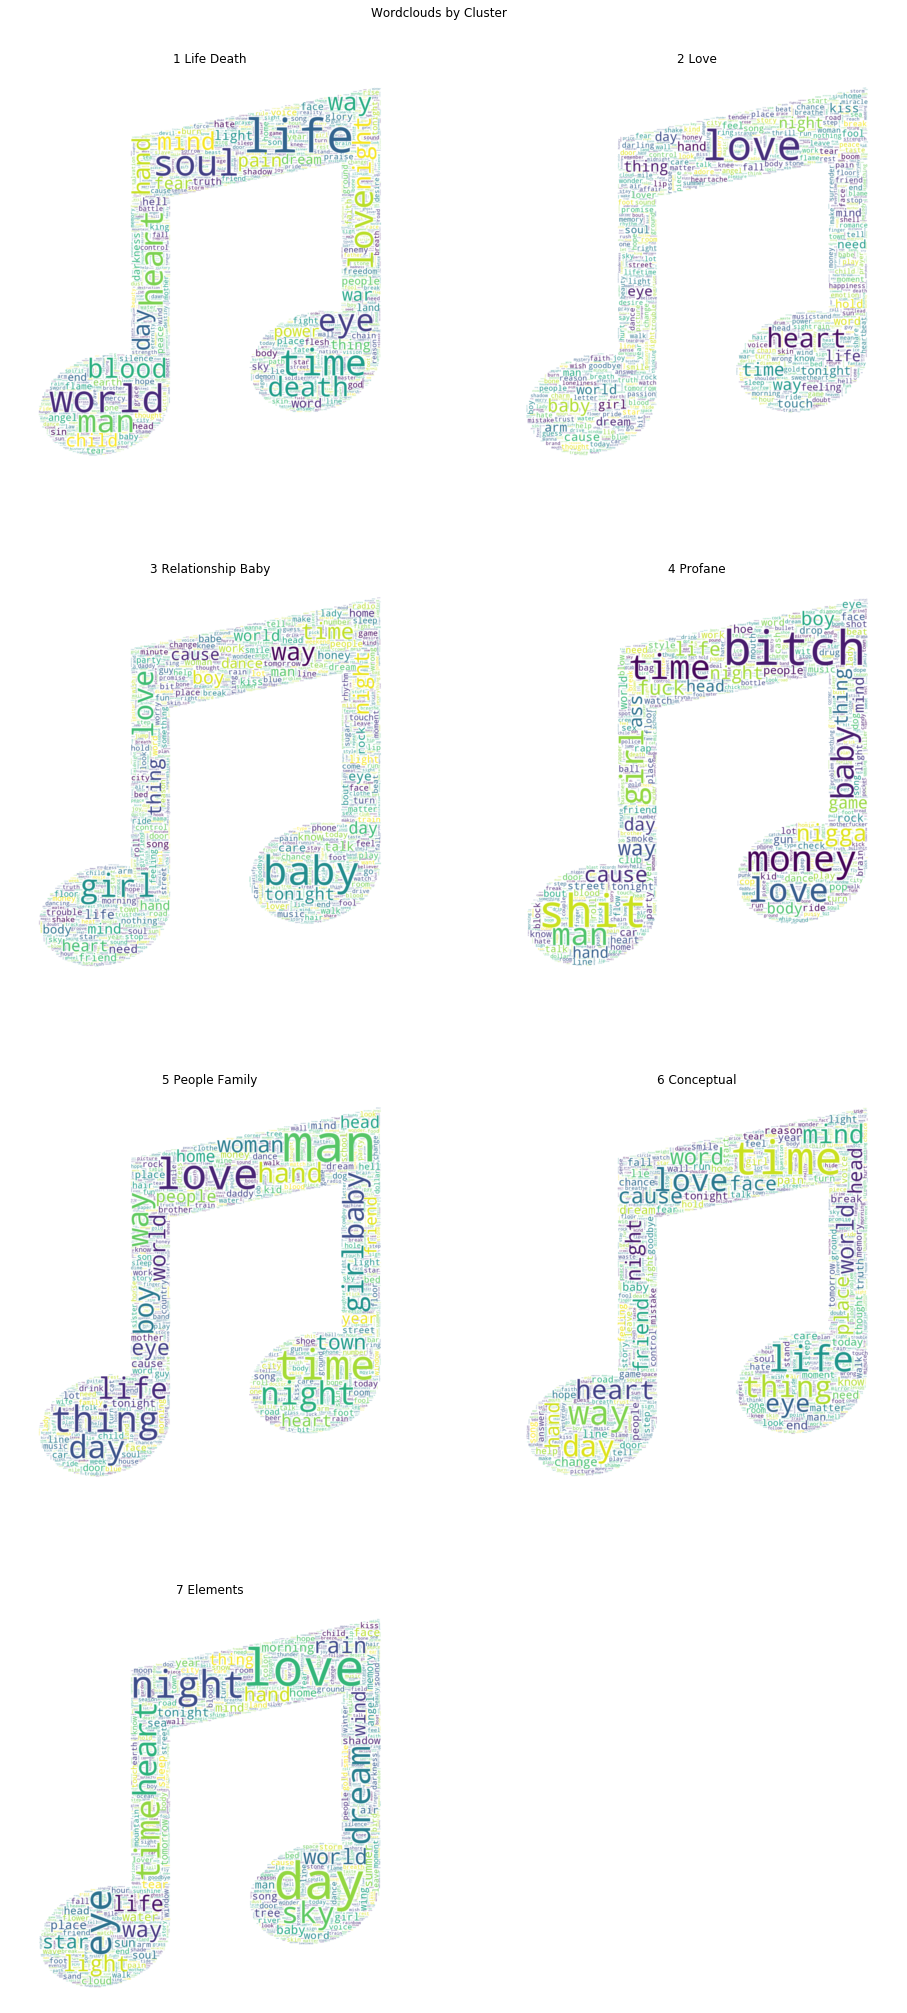

In [54]:
plt.figure(figsize=(16, 36))

plt.suptitle('Wordclouds by Cluster', y=.9)

for i, cluster in enumerate(unique_clusters, 1):
    plt.subplot(4, 2, i)
    plt.imshow(wordclouds[cluster], interpolation='bilinear')
    plt.title(' '.join(cluster.split('_')))
    plt.axis('off')
    
plt.show()

Make a training corpus-wide wordcloud.

In [48]:
wc.generate(all_string)
filename = out_path + 'all_clusters.png'
dirname = os.path.dirname(filename)
if not os.path.exists(dirname):
    os.makedirs(dirname)
with open(filename, 'w'):
    wc.to_file(filename)

Plot the wordcloud for the entire training corpus.

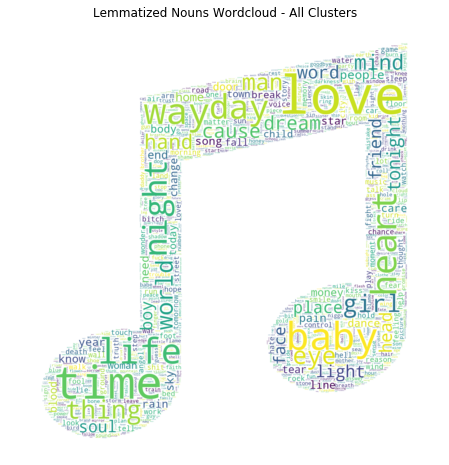

In [50]:
all_wordcloud = Image.open(r'C:\Users\philb\Repos\Thinkful_repo\projects\unsupervised_capstone\wordclouds\wordcloud_all_clusters.png')

plt.figure(figsize=(8,8))

plt.imshow(all_wordcloud, interpolation='bilinear')
plt.title('Lemmatized Nouns Wordcloud - All Clusters')
plt.axis('off')
plt.show()

## 6.2: Cluster Inspection

Look into the top words of each cluster.

In [57]:
counter = {}
for cluster in unique_clusters:
    counter[cluster] = Counter(strings_by_cluster[cluster].split())

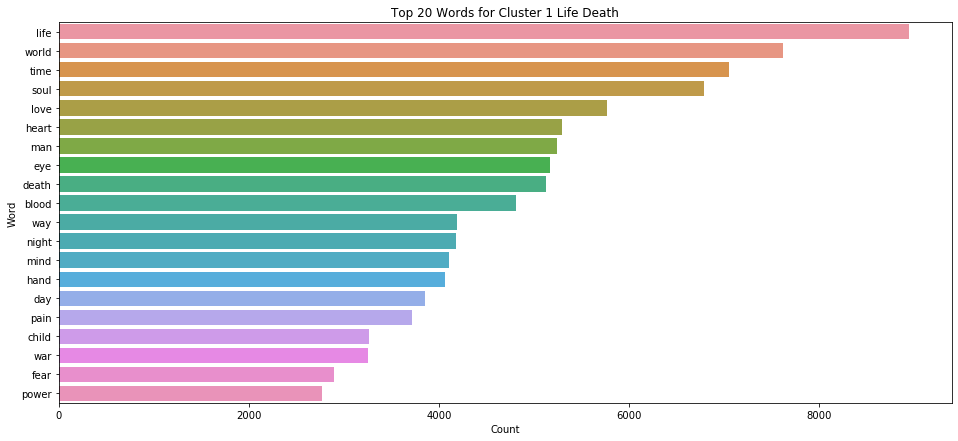

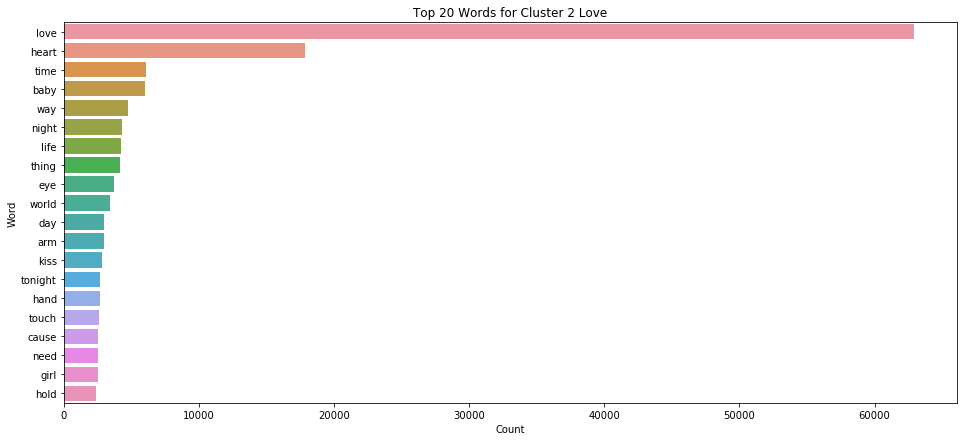

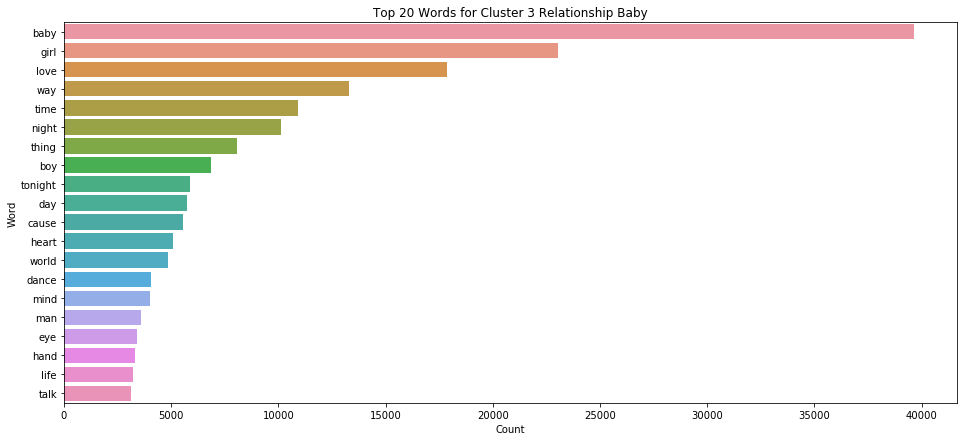

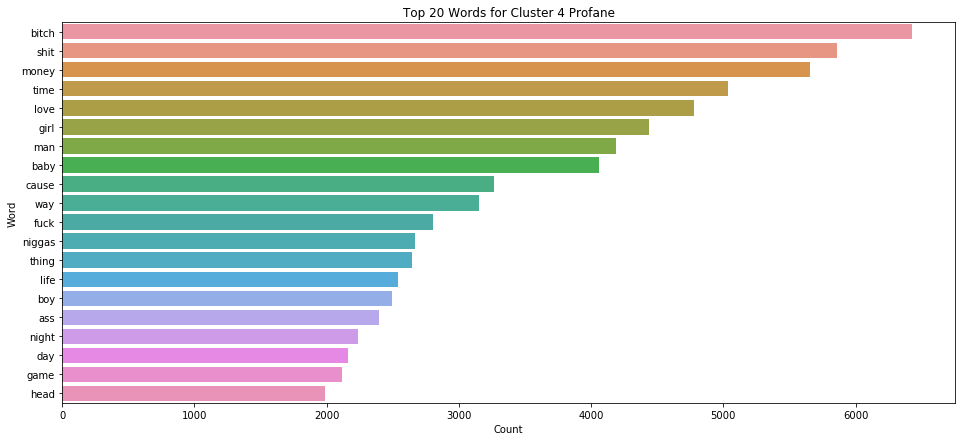

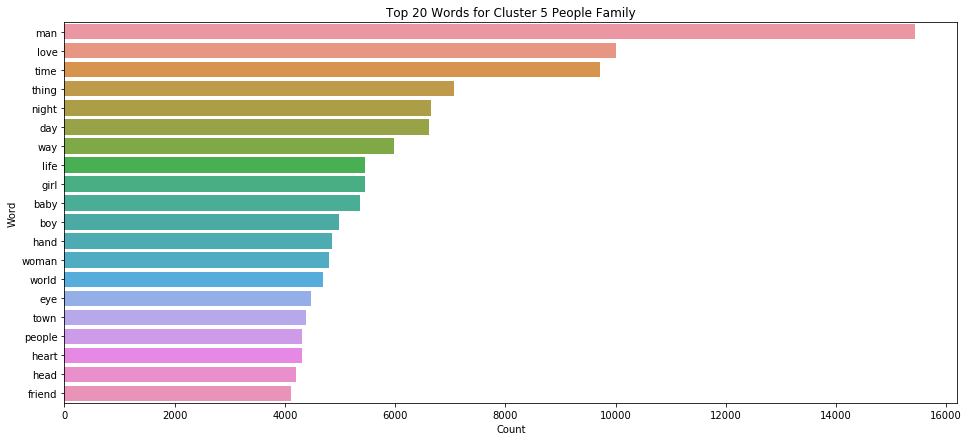

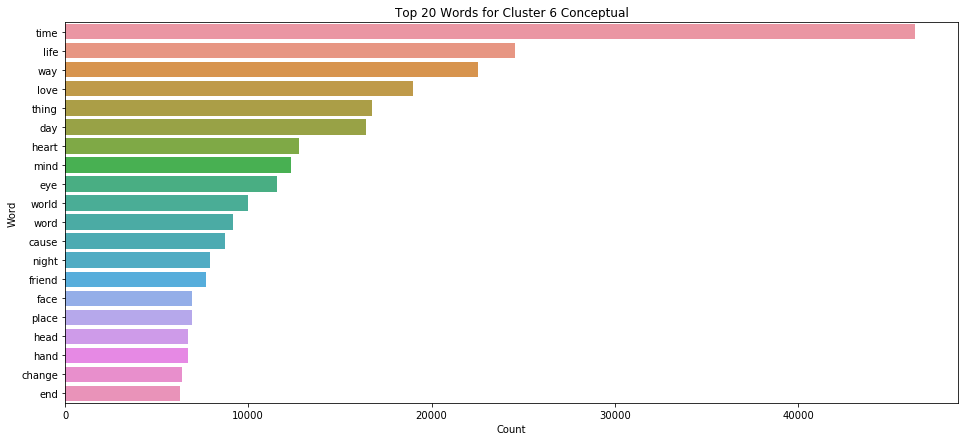

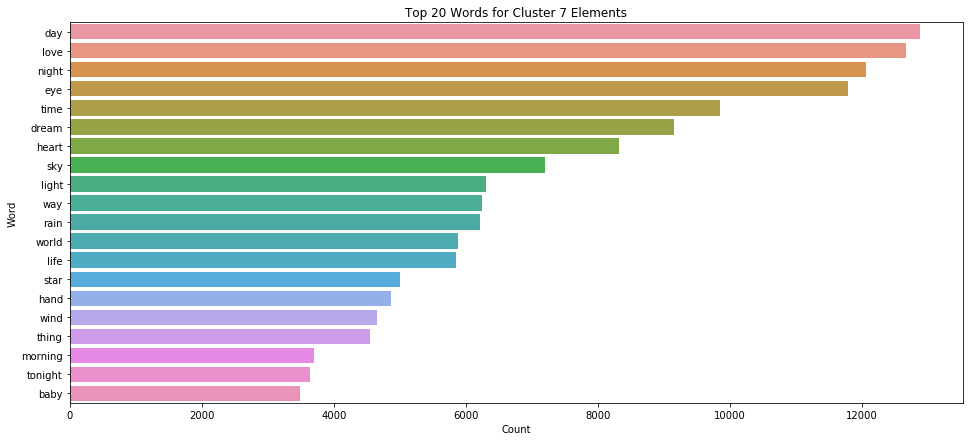

In [71]:
for cluster in counter:
    words = [w_c[0] for w_c in counter[cluster].most_common(20)]
    counts = [w_c[1] for w_c in counter[cluster].most_common(20)]
    plt.figure(figsize=(16,7))
    sns.barplot(x=counts, y=words)
    plt.title(f'Top 20 Words for Cluster {" ".join(cluster.split("_"))}')
    plt.ylabel('Word')
    plt.xlabel('Count')
    plt.show()

Some clusters have an extreme number of top word counts. It is interesting that probably the most well defined clusters, namely Life/Death and Elements have a pretty small number of counts. Keep in mind that the pure size of particular clusters is probably what makes certain word counts so high, such as the Conceptual cluster, which is quite broad and takes up a large chunk of the data as a whole.

Could be useful to inspect the total unique keywords appearing in each cluster as well.

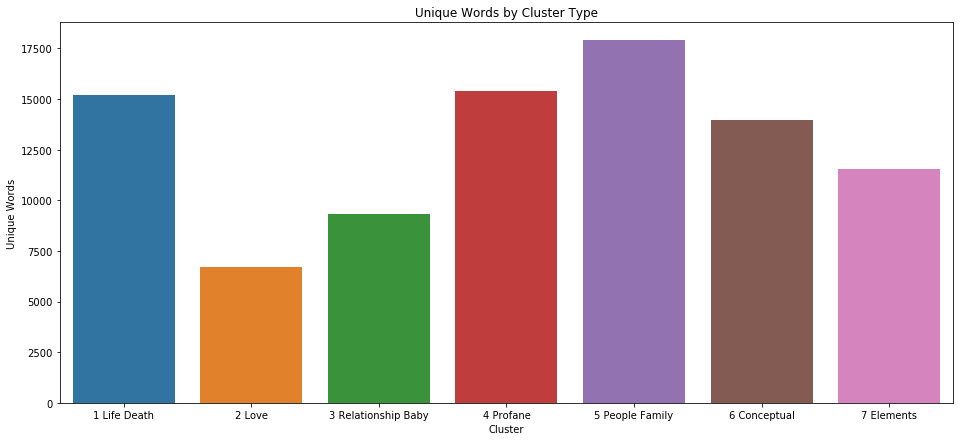

In [84]:
x = [str(' '.join(cluster.split('_'))) for cluster in counter]
y = [len(counter[cluster]) for cluster in counter]
plt.figure(figsize=(16, 7))
sns.barplot(x, y, orient='y')
plt.title('Unique Words by Cluster Type')
plt.xlabel('Cluster')
plt.ylabel('Unique Words')
plt.show()

This can partially be garnered from the wordclouds and top words from above, it is interesting that love (2) and relationships (3) have a relatively non-unique number of words in comparison to the other clusters. Perhaps, the clusters with more unique words need to be pared down to create more specific topics?

## 6.3: Conclusion

Now, after many iterations and a lot of compute time the conclusion to all this is that there is much more that can be done. The methods here do seem to have some potential use, however, more cleaning likely needs to be done to the base data. It is likely that more corpus specific stop words may lead to more specific and specialized topics in songs. Also, it could be useful to extend the current limitation of nouns-only to include other parts of speech. This model does appear to remain relatively consistent which was expressed in the consistency of the t-SNE plot comparisons of the training data and holdout data as well as the general breakdown of clusters and their distributions that K-Means indicated. With more computing power and time, it would be likely to find more useful topic models and cluster methods to help add specificity to topics and clusters.

The most useful thing that has probably come out of this is that this approach appears to be a realistic method to grouping particular songs by their lyrical content. The process of using LDA as a topic modeling technique followed by the use of a clustering algorithm such as K-Means is likely a viable method for this type of data.

The primary limitations and potential next steps for this project are as follows:
- Only lemmatized-nouns from lyrics were used in topic modeling
- The text cleaning, while relatively thorough, is definitely far from perfect
- The compute speed for my local machine on this amount of data is cumbersome for a number of the processes (particularly LDA and the other topic modeling techniques presented; using silhouette scores as an evaluation metric - useful but time consuming; and using t-SNE as a visualization technique)
- Better validation could likely be presented, but the visual inspections for this particular data were generally pretty spot on
- Better definitions and explanations for both the topics generated as well as the clusters found
- Specific lyric corpus stop words could be added (the noun limitation generally took care of this - but there are definitely more stop words that could be added, so if extending to non-nouns the decision on what words to exclude could become difficult)
- Only single tokens were used here, extending the corpus to bigrams/trigrams/x-grams could be useful, but also likely computationally more expensive
- Corpus specific words in the cleaning/lemmatization/tokenization process could be added to improve results
- Limiting a topic/cluster to a maximum number of songs/lyrics may prove useful
- Create song tags based on the clustering/topic modeling
- Further exploration into song length (words/characters) as a potential feature
- Exploration into uniqueness of words in songs as a feature

There are definitely more ways this project could be improved than the listed items above. Overall, some of the clusters found appear useful and could be used for tagging (Life/Death and Profane for instance), but even those cluster titles aren't particularly correct and need better definitions. Ultimately, this project could be a simple framework for more advanced (and likely) more useful iterations of the same thing.

## Shortcuts

Notebook Shortcuts:
1. [Introduction and Limitations](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/unsupervised_capstone/1_Introduction_and_Limitations.ipynb)
2. [Exploration](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/unsupervised_capstone/2_Exploration.ipynb)
3. [Cleaning Lyrics](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/unsupervised_capstone/3_Cleaning_Lyrics.ipynb)
4. [Topic Modeling](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/unsupervised_capstone/4_Topic_Modeling.ipynb)
5. [More Topic Modeling and Clustering](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/unsupervised_capstone/5_More_Topic_Modeling_and_Clustering.ipynb)
6. [Conclusion and Wordclouds](https://github.com/philbowman212/Thinkful_repo/blob/master/projects/unsupervised_capstone/6_Conclusion_and_Wordclouds.ipynb) (you are here)